In [63]:
import pandas as pd
import numpy as np 
import datetime as dt
import re
import os
import geojson
import seaborn as sns
from shapely.geometry import shape, GeometryCollection
from shapely.geometry import Polygon, MultiPolygon
import pandas 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline





In [ ]:
def map():
    with open('D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/Other Courses/programming course for DS/project/taxi_zones.geojson') as f:
        gj = geojson.load(f)
    features = gj['features']
    return features

In [3]:
def info(a):
    print('it has dimensions {}, shape {}, size {}'.format(a.ndim,a.shape,a.size))

In [4]:
def zone():
    
    #os.getcwd()
    #os.chdir('C:/Users/ADMIN/AppData/Local/tmc/vscode/hy-data-analysis-with-python-2020/part03-e03_most_frequent_first/src/')
    file = pd.read_csv('D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/Other Courses/programming course for DS/project/taxi_zones.csv',sep=',')
    return file[file.Borough == 'Queens']

# Filter Queens trips: Open trip files and return data relates to Queens borough, then merge seperate files into 1 dataframe.
def data():
    z = zone()
    queens = z.LocationID.unique()
    result = []
    for i in range(1,10):
        raw = pd.read_parquet(f'D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/Other Courses/programming course for DS/project//trip_data/0{i}.parquet', engine='pyarrow')
        df = raw[raw['PULocationID'].isin(queens)]
        df['Month'] = i
        result.append(df)
    for j in range(10,13):
        raw = pd.read_parquet(f'D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/Other Courses/programming course for DS/project//trip_data/{i}.parquet', engine='pyarrow')
        df = raw[raw['PULocationID'].isin(queens)]
        df['Month'] = j
        result.append(df)
    return pd.concat(result)



df = zone()
#df.to_csv("C:/Users/kyral/Documents/GitHub/PDS_Yellowcab_UoC/data/output/locationID.csv")
#print('fdsfds')
#d = data()
#info(df)

queens = df['LocationID'].unique()
#print(d.head())
raw = pd.read_parquet(f'D:/TOPIC_RELATED VOCABULARY IELTS/Finland/aalto/cemsschool/Other Courses/programming course for DS/project//trip_data/11.parquet', engine='pyarrow')
idx = raw['PULocationID'].isin(queens)
#info(queens)
info(idx) #it has dimensions 1, shape (6339567,)
res= raw[idx]
#info(res) 414196
# d.to_csv("C:/Users/kyral/Documents/GitHub/PDS_Yellowcab_UoC/data/output/trips.csv")
#print(res.head())
#print(np.sum(res['tpep_pickup_datetime'].dt.weekday==0))
#print(res['tpep_pickup_datetime'].dt.weekday.unique())
#satraw= raw['tpep_pickup_datetime'].dt.weekday==5
#satres= res['tpep_pickup_datetime'].dt.weekday==5
#sunraw= raw['tpep_pickup_datetime'].dt.weekday==6
#sunres= res['tpep_pickup_datetime'].dt.weekday==6
#info(sat)
#info(sun)
#d1 = dict(zip(np.arange(0,7),[0,0,0,0,0,1,1]))
#s1res = pd.Series(res.iloc[:,0].dt.weekday.map(d1))
#s1raw= pd.Series(raw.iloc[:,0].dt.weekday.map(d1))
#print(np.sum(res['weekend']==1))
#print(res.head())
#print(res.iloc[:,1]-res.iloc[:,0])
#s1res =s1res.rename('weekend')
#s1raw = s1raw.rename('weekend')
#print(s1)
#res= pd.concat((res,s1res),axis=1)
#raw= pd.concat((raw,s1raw), axis=1)
#info(res)
#info(res2)
#print(res2.head())

it has dimensions 1, shape (1409936,), size 1409936


In [7]:
# AUGMENTED DATASET
raw['start_month']=raw['tpep_pickup_datetime'].dt.month_name()
raw['end_month']=raw['tpep_dropoff_datetime'].dt.month_name()
months =['January','February','March', 'April','May','June','July','August','September','October','November','December']
dmonths= dict(zip(months,np.arange(1,13,1)))
raw['start_month_num']=raw['start_month'].map(dmonths)
raw['end_month_num']=raw['end_month'].map(dmonths)

raw['start_day']=raw['tpep_pickup_datetime'].dt.dayofweek
raw['end_day']=raw['tpep_dropoff_datetime'].dt.dayofweek
dday= dict(zip(np.arange(0,7,1),[0,0,0,0,0,1,1]))
raw['weekend_starttrip']=raw['start_day'].map(dday)
raw['weekend_endtrip']=raw['end_day'].map(dday)

raw['start_hour']=raw['tpep_pickup_datetime'].dt.hour
raw['end_hour']=raw['tpep_dropoff_datetime'].dt.hour
raw['duration']= (raw['tpep_dropoff_datetime']-raw['tpep_pickup_datetime'])/np.timedelta64(1,'s')

#start and end position



<AxesSubplot:xlabel='duration', ylabel='Count'>

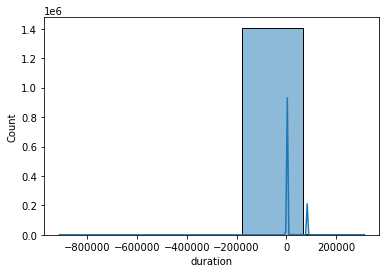

In [44]:
sns.histplot(raw['duration'], bins=5, kde=True)



In [1]:
sns.histplot(raw['trip_distance'],kde=True)

NameError: name 'sns' is not defined

In [ ]:
# OUTLIERS+ UNREALISTIC OF trip distance, longitude, latitude

In [40]:
print(raw.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2020-11-01 00:37:37   2020-11-01 00:51:45              1.0           1.80   
1  2020-11-01 00:17:41   2020-11-01 00:32:22              2.0           2.80   
2  2020-11-01 00:42:29   2020-11-01 01:09:08              2.0           8.10   
3  2020-11-01 00:28:59   2020-11-02 00:00:00              1.0           6.38   
4  2020-11-01 00:13:26   2020-11-01 00:22:59              1.0           1.96   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0           246           137           1.0         10.0    3.0   
1         1.0           229             4           2.0         11.5    3.0   
2         1.0           144            83           1.0         27.0    3.0   
3         1.0           132           205           2.0         22.0    0.5   
4         1.0           166            42           2.0          9.0    0.5   

   ...  start_day  end_day  start_hour  end_

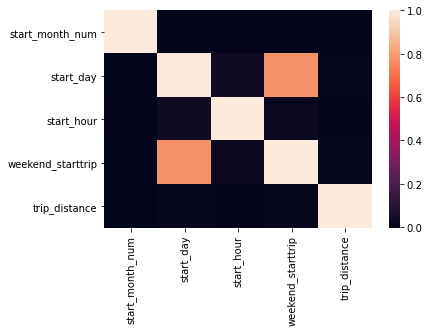

In [24]:
#VISUALIZATION
#relationship among features
idxc= ['start_month_num', 'start_day', 'start_hour', 'weekend_starttrip', 'trip_distance']

corr= raw[idxc].corr()
sns.heatmap(corr)
plt.show()

In [35]:
#MACHINE LEARNING PROCESS CUSTOMIZED 
#pre-process data(filling missing values, categorical features to dummies one,etc)

#standardize/normalize @What if data does not follow normal dist?
# optional: train-test to get a fraction of this dataset 
#train-test split
#decide on the model based on visulization of the relationship among features, 
#train model 
#cross-validation(gridsearchCV) to tune hypeparameters
# compare performance between training and testing data


In [37]:
X= raw[idxc]

In [38]:
#print(X.head())

   start_month_num  start_day  start_hour  weekend_starttrip  trip_distance
0               11          6           0                  1           1.80
1               11          6           0                  1           2.80
2               11          6           0                  1           8.10
3               11          6           0                  1           6.38
4               11          6           0                  1           1.96


In [41]:
#train-test split
X_train, X_test, y_train, y_test= train_test_split(X.drop('trip_distance',axis=1),X['trip_distance'], test_size=0.3)

In [43]:
print(y_train)

722898     7.60
311949     3.61
133183     1.77
1060318    0.90
642696     2.70
           ... 
41308      1.60
1001548    1.56
280693     6.08
1376650    1.91
886957     1.93
Name: trip_distance, Length: 986955, dtype: float64


In [64]:
polyfeatures= PolynomialFeatures()
linmodel = LinearRegression()
lasso= Lasso()
pip= Pipeline([
    ('polyfeatures',polyfeatures),
    ('linmodel', linmodel)
               ])
hyperparameters_grid= {
    'polyfeatures__degree': [1,2,3]}



In [45]:
X_train_po= polyfeatures.fit_transform(X_train)

In [52]:
#print(X_train_po.shape[1])
print(X_train_po)

[[  1.  11.   6. ... 144.  12.   1.]
 [  1.  11.   5. ... 169.  13.   1.]
 [  1.  11.   1. ... 361.   0.   0.]
 ...
 [  1.  11.   4. ... 361.   0.   0.]
 [  1.  11.   0. ...  81.   0.   0.]
 [  1.  11.   2. ... 289.   0.   0.]]


In [65]:
grid=GridSearchCV(pip,hyperparameters_grid,verbose=True, cv=5, n_jobs=4, scoring='neg_root_mean_squared_error')

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [70]:
np.abs(grid.cv_results_['mean_test_score'])

array([9.76583868e+00, 9.74799714e+00, 1.58391819e+05])

In [71]:
os.getcwd()

'C:\\Users\\ADMIN'

In [4]:
#info(raw)
features= map()
#print(features[0:10])
#print(len(features))

#print(len(features[0]))
L = []
for i in np.arange(2,10):
    shape= features[i]['geometry']['coordinates'][0]
#shape1= features[1]['geometry']['coordinates'][0]
#co =Polygon(shape1[0]).centroid.coords
    co =Polygon(shape).centroid.coords
#co1 = MultiPolygon(shape1[0])
#print(queens)
#zip(,co)
#print(len(shape1[0]))
    colist = list(co)
    
    L.append(colist)
#print(len(L))
subqueens = queens[0:8]
d1 = dict(zip(subqueens,L))
#print(d1)
a = pd.Series(res['PULocationID'].map(d1))
idx = a.notnull()
#info(idx)
#info(a)
#info(res)
#print(a)
#print(a[idx])
#print(len(a[idx]))
#print(type(a[idx]))
durationres = res.iloc[:,1]-res.iloc[:,0]
durationraw = raw.iloc[:,1]-raw.iloc[:,0]
durationres = durationres.rename('duration')
durationraw = durationraw.rename('duration')

res = pd.concat((res,durationres),axis=1)
raw = pd.concat((raw,durationraw),axis=1)
#print(raw.describe())
#print(res.describe())
#print((duration))
#print(res.head)
#print(duration.mean())
#print(duration.std())
b = res.iloc[:,0]
b= b.reindex(b)
#print(b.index.dayofweek.unique())
d2= dict(zip(np.arange(0,7),np.arange(11,18)))
values = b.index.dayofweek.map(d2)
#info(values)
#pd.concat([values,b])
#print(type(values))
seva= values.to_series()
#print(np.sum(b.index.duplicated()))
seva.index= np.arange(0,414196)
#print(seva)
#se = pd.concat((b,seva), axis=1)
#print((se.isnull()))


In [80]:

#pd.concat((res,duration))
#print(res[0:30])
#res= res.set_index('tpep_pickup_datetime')
#print(res.groupby('day'))
#print(res.head())
#print(res.index.floor('d'))
#res.groupby(res[])
#print(res.groupby(res['tpep_pickup_datetime'].dt.dayofweek).mean())
#print(res.groupby(res['tpep_dropoff_datetime'].dt.dayofweek).mean())
#print(res.groupby(res['tpep_pickup_datetime'].dt.month).mean())
#print(res.groupby(res['tpep_pickup_datetime'].dt.hour).mean())
#print(res.iloc[:,0].dt.weekday.unique())
#print(res['weekend']==1)
#info(res['weekend']==1)
#print(np.sum(res['weekend']==1))
#print(res.groupby(res['weekend']).mean())
#print(res[-100::][::-1])
#print(duration)
#help(seaborn.heatmap)
#help(res.pivot)
#print(res['duration'].total_seconds())
#print(300/3600)
#print(5/60)
timestr= '00:04:23'
ftr = [3600,60,1]
L1= [int(i) for i in timestr.split(':')]
#print(L1)
#print([a*b for a,b in zip(ftr,L1)])) 1*23s + 4'*60s + 0h*3600s

ares= res['duration']/np.timedelta64(1,'s')
#araw= raw['duration']/np.timedelta64(1,'s')
ares.T.drop_duplicates()
#araw.T.drop_duplicates()
#print(ares)
duflres=pd.Series(ares).rename('durationfloat')
#print(ares)
#print(res.head())
#duflraw=pd.Series(araw).rename('durationfloat')
res= pd.concat((res,duflres),axis=1)
#raw= pd.concat((raw, duflraw), axis=1)
#res.T.drop_duplicates(inplace=True)
#print(res.describe())
#print(raw.describe())
idxres = res.iloc[:,-1]>=0
#idxraw = raw.iloc[:,-1]>=0
#rawraw= raw[idxraw]
#print(rawraw.describe())
#print(len(rawraw))
#GET RID OF OUTLIERS (9.9*10^2 -3.8*10^2)*1.5=9.15*10^2|| 9.9*10^2 + 9.15*10^2
#idxoutli= rawraw.iloc[:,-1]<=1905
#rawraw= rawraw[idxoutli]
#print(stats.shapiro(rawraw.iloc[0:4000:,-1]))
#print(res.head())
#print(5%3)
#print(res.groupby(res['tpep_pickup_datetime'].dt.month).mean())
#print(res.groupby(res['dufl'].dt.month.mean()))
#duration/np.timedelta64(1,'s')
#https://stackoverflow.com/questions/26456825/convert-timedelta64ns-column-to-seconds-in-python-pandas-dataframe/50500560
#help(np.timedelta64)
#info(res)
#plt.hist(res.iloc[:,19],bins=414196)
#info(res.iloc[:,19])
#print(res.iloc[:,19].max())#-res.iloc[:,19].min()

#print(res.iloc[:,19].min())
#ran= res.iloc[:,19].max()-res.iloc[:,19].min()
#ranraw = rawraw.iloc[:,-1].max()-rawraw.iloc[:,-1].min()
#numinterval= np.sqrt(len(res))
#numintervalraw= np.sqrt(len(rawraw))
#print(numinterval)
#bins= ran/numinterval
#bins = ranraw/numintervalraw
#print(bins)
#print(rawraw.describe())
#plt.hist(res.iloc[:,19],bins=np.arange(0,4000))
#print(rawraw.describe())

#2c/ q-q plot
#kurtosis, skewness
#plt.hist(rawraw.iloc[:,-1], bins=50) # right skewed
#https://datatofish.com/plot-histogram-python/
#help(plt.hist)
#print(np.sum(res.iloc[:,19]>1000))
# visual inspection: q-q plot/ stat: shapiro wilk test
#3b/
#info(res)
#cor = res.corr()
#plt.figure(figsize = (10,6))
#sns.heatmap(cor,annot=True)
#3/
#K-fold Cross validation 
# training and testing data points
#normalize the data features (level of measurement )
#pca
#3b/
#print(np.arange(22)==6)
#print(res.shape[1])
#print(res.iloc[:,[i for i in np.arange(res.shape[1])]])
#print(res.iloc[:,[i for i in np.arange(res.shape[1]) if i!=8]]) # column fare_amount is not included
#model1= LinearRegression()
#model1.fit(res.iloc[:,],res.iloc[:,6])
idxdup = ~res.columns.duplicated() # return a boolean array
#https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
#print(len(df))
#print(len(res.columns))
#print(len(df))
res =res.loc[:,idxdup]
#info(res)
#print(res.head())
#print(res.iloc[:,[i for i in np.arange(res.shape[1]) if i!=8]])
X= res.iloc[:,[i for i in np.arange(res.shape[1]) if i!=0 if i!=1 if i!=8 if i!=17  ]]
y=res.iloc[:,8]
Xtrain,Xtest, ytrain, ytest= train_test_split(X,y, train_size=0.8,random_state=0)
info(Xtrain)
info(ytrain)
info(Xtest)
model1.fit(Xtrain,ytrain)
#print(model1.coef_)
#print(model1.score(Xtest,ytest))
#info(X)
model2 = PolynomialFeatures()
model

it has dimensions 2, shape (331356, 15), size 4970340
it has dimensions 1, shape (331356,), size 331356
it has dimensions 2, shape (82840, 15), size 1242600
0.9991340915511805


In [49]:
#print(pd.DataFrame([[1,2,3,4],list('abcd')], columns=list("ABCD")))

#('C:/Users/ADMIN/AppData/Local/tmc/vscode/hy-data-analysis-with-python-2020/part03-e03_most_frequent_first/src/most_frequent_first.py')
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `